<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>


# <!-- TITLE --> [BHP1] - Regression with a Dense Network (DNN)
<!-- DESC --> A Simple regression with a Dense Neural Network (DNN) - BHPD dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Predicts **housing prices** from a set of house features. 
 - Understanding the **principle** and the **architecture** of a regression with a **dense neural network**  


The **[Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)** consists of price of houses in various places in Boston.  
Alongside with price, the dataset also provide information such as Crime, areas of non-retail business in the town,  
age of people who own the house and many other attributes...

## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Build a model
 - Train the model
 - Evaluate the result


## Step 1 - Import and init

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,sys

sys.path.append('..')
import fidle.pwk as ooo

ooo.init()


FIDLE 2020 - Practical Work Module
Version              : 0.4.2
Run time             : Wednesday 26 February 2020, 18:59:13
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf


## Step 2 - Retrieve data

### 2.1 - Option 1  : From Keras
Boston housing is a famous historic dataset, so we can get it directly from [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)  

### 2.2 - Option 2 : From a csv file
More fun !

In [2]:
data = pd.read_csv('./data/BostonHousing.csv', header=0)

display(data.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))
print('Données manquantes : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Données manquantes :  0   Shape is :  (506, 14)


## Step 3 - Preparing the data
### 3.1 - Split data
We will use 70% of the data for training and 30% for validation.  
The dataset is **shuffled** and shared between **learning** and **testing**.  
x will be input data and y the expected output

In [3]:
# ---- Suffle and Split => train, test
#
data_train = data.sample(frac=0.7, axis=0)
data_test  = data.drop(data_train.index)

# ---- Split => x,y (medv is price)
#
x_train = data_train.drop('medv',  axis=1)
y_train = data_train['medv']
x_test  = data_test.drop('medv',   axis=1)
y_test  = data_test['medv']

print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)

Original data shape was :  (506, 14)
x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


### 3.2 - Data normalization
**Note :** 
 - All input data must be normalized, train and test.  
 - To do this we will **subtract the mean** and **divide by the standard deviation**.  
 - But test data should not be used in any way, even for normalization.  
 - The mean and the standard deviation will therefore only be calculated with the train data.

In [4]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.67,9.50,11.09,0.07,0.56,6.28,69.05,3.70,9.73,409.71,18.58,360.94,12.52
std,8.60,20.88,6.74,0.26,0.11,0.71,27.43,2.04,8.77,170.77,2.09,85.01,7.06
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,13.00,0.32,1.92
25%,0.09,0.00,5.19,0.00,0.46,5.90,46.52,2.11,4.00,277.50,17.40,376.71,7.21
50%,0.27,0.00,9.12,0.00,0.54,6.22,76.85,3.17,5.00,330.00,19.10,392.08,11.17
75%,3.69,0.00,18.10,0.00,0.62,6.59,93.55,4.81,24.00,666.00,20.20,396.90,16.32
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,34.77


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.43,-0.46,-1.58,-0.28,-1.52,-3.84,-2.41,-1.26,-1.00,-1.30,-2.66,-4.24,-1.50
25%,-0.42,-0.46,-0.88,-0.28,-0.88,-0.54,-0.82,-0.78,-0.65,-0.77,-0.56,0.19,-0.75
50%,-0.40,-0.46,-0.29,-0.28,-0.17,-0.09,0.28,-0.26,-0.54,-0.47,0.25,0.37,-0.19
75%,0.00,-0.46,1.04,-0.28,0.60,0.44,0.89,0.54,1.63,1.50,0.78,0.42,0.54
max,9.92,4.33,2.47,3.55,2.79,3.53,1.13,4.13,1.63,1.76,1.64,0.42,3.15


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
437,1.34,-0.46,1.04,-0.28,1.63,-0.18,1.13,-0.88,1.63,1.50,0.78,-4.14,1.97
163,-0.25,-0.46,1.26,3.55,0.43,2.96,0.91,-0.76,-0.54,-0.04,-1.85,0.32,-1.30
438,1.16,-0.46,1.04,-0.28,1.63,-0.49,0.69,-0.92,1.63,1.50,0.78,-3.43,3.05
228,-0.39,-0.46,-0.73,-0.28,-0.47,1.98,-1.90,-0.16,-0.20,-0.60,-0.56,0.19,-1.22
58,-0.41,0.74,-0.88,-0.28,-0.92,-0.19,-1.45,2.02,-0.20,-0.74,0.54,0.35,-0.80


## Step 4 - Build a model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
  def get_model_v1(shape):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(1, name='Output'))
    
    model.compile(optimizer = 'rmsprop',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

## Step 5 - Train the model
### 5.1 - Get it

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_n1 (Dense)             (None, 64)                896       
_________________________________________________________________
Dense_n2 (Dense)             (None, 64)                4160      
_________________________________________________________________
Output (Dense)               (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


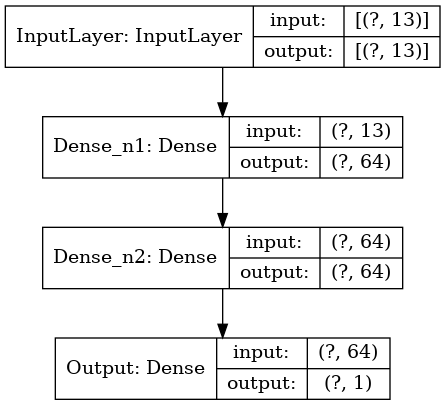

In [6]:
model=get_model_v1( (13,) )

model.summary()
keras.utils.plot_model( model, to_file='./run/model.png', show_shapes=True, show_layer_names=True, dpi=96)

### 5.2 - Train it

In [7]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 100,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_test, y_test))

Train on 354 samples, validate on 152 samples
Epoch 1/100
354/354 [==============================] - 1s 2ms/sample - loss: 484.1251 - mae: 20.0241 - mse: 484.1250 - val_loss: 336.1387 - val_mae: 16.2959 - val_mse: 336.1387
Epoch 2/100
354/354 [==============================] - 0s 174us/sample - loss: 266.9655 - mae: 14.1105 - mse: 266.9655 - val_loss: 115.0929 - val_mae: 8.7476 - val_mse: 115.0929
Epoch 3/100
354/354 [==============================] - 0s 171us/sample - loss: 96.2638 - mae: 7.6200 - mse: 96.2637 - val_loss: 49.2646 - val_mae: 5.6468 - val_mse: 49.2646
Epoch 4/100
354/354 [==============================] - 0s 161us/sample - loss: 48.7173 - mae: 5.2081 - mse: 48.7173 - val_loss: 29.1408 - val_mae: 4.2536 - val_mse: 29.1408
Epoch 5/100
354/354 [==============================] - 0s 158us/sample - loss: 34.5634 - mae: 4.2277 - mse: 34.5634 - val_loss: 19.6660 - val_mae: 3.4774 - val_mse: 19.6660
Epoch 6/100
354/354 [==============================] - 0s 159us/sample - loss: 2

## Step 6 - Evaluate
### 6.1 - Model evaluation
MAE =  Mean Absolute Error (between the labels and predictions)  
A mae equal to 3 represents an average error in prediction of $3k.

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

x_test / loss      : 8.6139
x_test / mae       : 2.2045
x_test / mse       : 8.6139


### 6.2 - Training history
What was the best result during our training ?

In [9]:

df=pd.DataFrame(data=history.history)
df.describe()

,loss,mae,mse,val_loss,val_mae,val_mse
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.096026,2.476698,18.096025,13.967839,2.586850,13.967839
std,54.625965,2.272933,54.625960,34.539291,1.585967,34.539293
min,5.018227,1.564279,5.018228,7.466392,2.056279,7.466392
25%,6.454060,1.777231,6.454060,8.083174,2.193839,8.083174
50%,8.368772,2.002227,8.368773,8.651632,2.297827,8.651632
75%,11.280877,2.313615,11.280877,9.527210,2.424410,9.527210
max,484.125081,20.024147,484.125031,336.138720,16.295881,336.138733


In [10]:
print("min( val_mae ) : {:.4f}".format( min(history.history["val_mae"]) ) )

min( val_mae ) : 2.0563


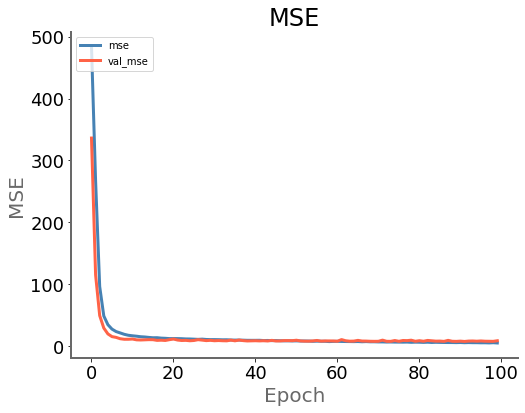

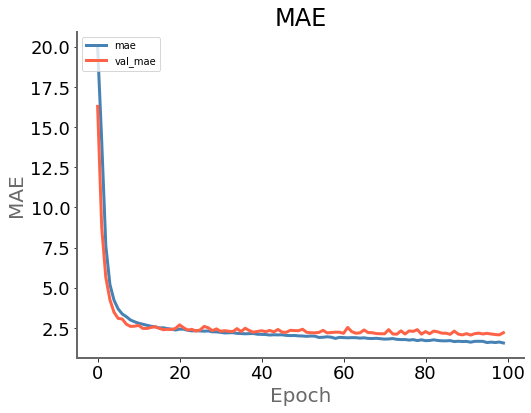

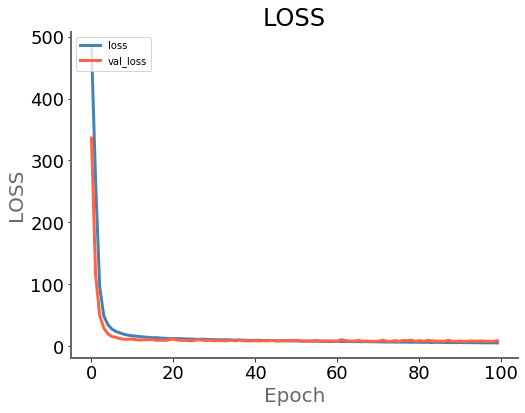

In [11]:
ooo.plot_history(history, plot={'MSE' :['mse', 'val_mse'],
                                'MAE' :['mae', 'val_mae'],
                                'LOSS':['loss','val_loss']})

## Step 7 - Make a prediction
The data must be normalized with the parameters (mean, std) previously used.

In [12]:
my_data = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]
real_price = 10.4

my_data=np.array(my_data).reshape(1,13)

In [13]:

predictions = model.predict( my_data )
print("Prédiction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))

Prédiction : 11.38 K$
Reality    : 10.40 K$


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>